**A1**

In [1]:
# Segregating the data given in the data set into two matrices using the nomenclature AX = C in 

import numpy as np
data = np.array([
    [20, 6, 2, 386],
    [16, 3, 6, 289],
    [27, 6, 2, 393],
    [19, 1, 2, 110],
    [24, 4, 2, 280],
    [22, 1, 5, 167],
    [15, 4, 2, 271],
    [18, 4, 2, 274],
    [21, 1, 4, 148],
    [16, 2, 4, 198]
])

A = data[:, :-1] 
C = data[:, -1] 
print("The Matrix A with features details is:\n", A)
print("The Matrix C with payment deatils is:\n", C)

# What is the dimensionality of the vector space for this data?

# The Dimensionality of the vector space is the number of features, in the given data in which is the number of columns in matrix A.
# In this case the number of features is 3. 


# How many vectors exist in this vector space?

# The number of vectors is the number of rows in matrix A. From the above dataset we can see it is 10.


# What is the rank of Matrix A?

# The rank of a matrix is the maximum number of linearly independent column vectors in the matrix. 
# We can calculate it using NumPy's linalg.matrix_rank function.

# Rank of matrix A
rank = np.linalg.matrix_rank(A)
print("\nThe Rank of Matrix: ", rank)

# We can find the psuedo inverse of the matrix by using the function linalg.pinv() from the numpy library

pseudoinv = np.linalg.pinv(A)
print("\n The Pseudo inverse is : ", pseudoinv)

The Matrix A with features details is:
 [[20  6  2]
 [16  3  6]
 [27  6  2]
 [19  1  2]
 [24  4  2]
 [22  1  5]
 [15  4  2]
 [18  4  2]
 [21  1  4]
 [16  2  4]]
The Matrix C with payment deatils is:
 [386 289 393 110 280 167 271 274 148 198]

The Rank of Matrix:  3

 The Pseudo inverse is :  [[-0.01008596 -0.03124505  0.01013951  0.0290728   0.0182907   0.01161794
  -0.00771348  0.00095458  0.01743623 -0.00542016]
 [ 0.09059668  0.07263726  0.03172933 -0.09071908 -0.01893196 -0.06926996
   0.05675464  0.03152577 -0.07641966  0.00357352]
 [ 0.00299878  0.15874243 -0.05795468 -0.06609024 -0.06295043  0.03348017
   0.01541831 -0.01070461  0.00029003  0.05938755]]


**A2**

In [3]:
# To Calculate the model vector X for predicting the cost of the products available with the vendor.
# This can be done by multiplying the pseudo-inverse to the payment vector we can get the model vector.
# X = pseudoinv(A) * C

# Calculate the model vector X
import numpy as np

X = np.dot(pseudoinv, C)
print("\nThe model vector X for predicting the cost of the products:", X)
productcosts = np.dot(A, X)
print("\nThe cost of each product is as follows:")
for i, cost in enumerate(productcosts):
    print(f"The cost of Product {i+1} is: Rs.{cost:.2f}")



The model vector X for predicting the cost of the products: [ 1. 55. 18.]

The cost of each product is as follows:
The cost of Product 1 is: Rs.386.00
The cost of Product 2 is: Rs.289.00
The cost of Product 3 is: Rs.393.00
The cost of Product 4 is: Rs.110.00
The cost of Product 5 is: Rs.280.00
The cost of Product 6 is: Rs.167.00
The cost of Product 7 is: Rs.271.00
The cost of Product 8 is: Rs.274.00
The cost of Product 9 is: Rs.148.00
The cost of Product 10 is: Rs.198.00


**A3**

In [4]:
import numpy as np

# Loading all the data from the excel given which describes the payment paid and the items purchased by 10 customers
purchase_data = np.array([
    [20, 6, 2, 386],
    [16, 3, 6, 289],
    [27, 6, 2, 393],
    [19, 1, 2, 110],
    [24, 4, 2, 280],
    [22, 1, 5, 167],
    [15, 4, 2, 271],
    [18, 4, 2, 274],
    [21, 1, 4, 148],
    [16, 2, 4, 198]
])

# Caluculating the Euclidian Distance among the two data points
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

#Performing the KNN Classifier
def knn_predict(X_train, y_train, x_test, k=3):
    distances = []
    for i, x_train in enumerate(X_train):
        distance = euclidean_distance(x_train, x_test)
        distances.append((distance, y_train[i]))
    distances = sorted(distances)[:k] 
    counts = np.bincount([d[1] for d in distances])
    return np.argmax(counts)

# Create the binary data in which if the payment made is above 250 rupees then assignment 1 else zero
y_train = np.where(purchase_data[:, -1] > 250, 1, 0)

X_train = purchase_data[:, :-1]

# Predicting the class for each customer payment given in the excel.
print("Predicted Classes:")
for i, customer in enumerate(X_train):
    predicted_class = knn_predict(X_train, y_train, customer)
    if predicted_class == 1:
        print(f"Customer {i+1}: RICH")
    else:
        print(f"Customer {i+1}: POOR")


Predicted Classes:
Customer 1: RICH
Customer 2: RICH
Customer 3: RICH
Customer 4: POOR
Customer 5: RICH
Customer 6: POOR
Customer 7: RICH
Customer 8: RICH
Customer 9: POOR
Customer 10: RICH


**A4**

The Mean of the column Price data is: 1560.663453815261
The Variance of the column Price data is: 58732.365352539186
The Sample mean of Wednesday for the column prices is: 1550.706
The Sample mean of April for the column prices is: 1698.9526315789474
The Probability of making a loss over the stock is: 0.4979919678714859
The Probability of making a profit on Wednesday is: 0.5
The Conditional probability of making profit on Wednesday is: 0.5


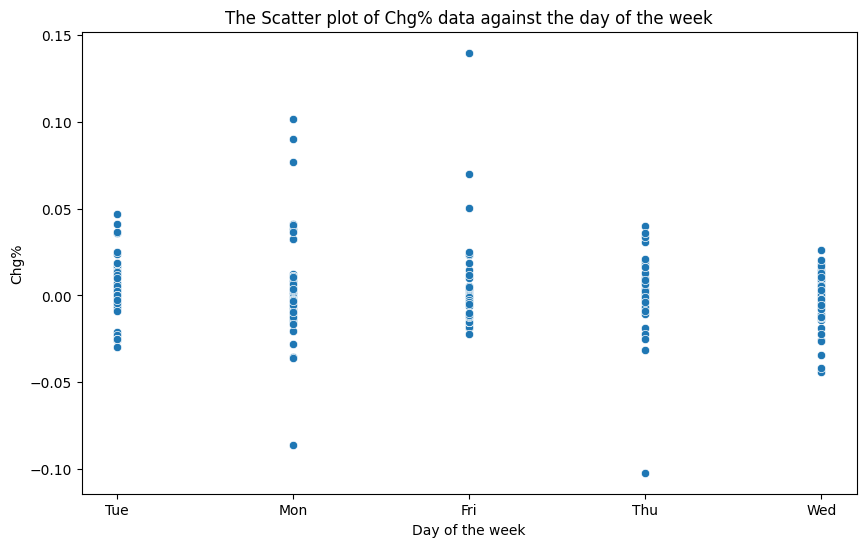

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

# Reading the excel file IRCTC Stock Price from the file path 
path = "C:\\Users\\nossa\\Downloads\\IRCTC Stock Price.xlsx"
df = pd.read_excel(path)

# From the library Statistics by using the predefined functions mean and variance to find the mean and variance from the Price
mean_of_price = statistics.mean(df['Price'])
variance_of_price = statistics.variance(df['Price'])
print("The Mean of the column Price data is:", mean_of_price)
print("The Variance of the column Price data is:", variance_of_price)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Selecting the column Price on Wednesday and finding the Sample Mean
wednesday = df[df['Day'] == 'Wed']['Price']
sample_mean_wednesday = statistics.mean(wednesday)
print("The Sample mean of Wednesday for the column prices is:", sample_mean_wednesday)

# Selecting the price data for the month of April and calculating the sample mean
april = df[df['Month'] == 'Apr']['Price']
sample_mean_april = statistics.mean(april)
print("The Sample mean of April for the column prices is:", sample_mean_april)

# Probability for making loss 
chg_percentages = df['Chg%'].apply(lambda x: float(x.strip('%')) if isinstance(x, str) else x)
loss_probability = len(chg_percentages[chg_percentages < 0]) / len(chg_percentages)
print("The Probability of making a loss over the stock is:", loss_probability)

# Probability of making a profit on Wednesday
profit_probability = len(wednesday[wednesday.diff() > 0]) / len(wednesday)
print("The Probability of making a profit on Wednesday is:", profit_probability)

# Conditional probability of making profit, given that today is Wednesday
conditional_profit_probability = len(wednesday[wednesday.diff() > 0]) / len(wednesday)
print("The Conditional probability of making profit on Wednesday is:", conditional_profit_probability)

# Scatter plot of Chg% data against the day of the week
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Day', y='Chg%')
plt.title('The Scatter plot of Chg% data against the day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Chg%')
plt.show()
